In [1]:
import nbsetup
import numpy as np

from simulations.automata.models import CA1DEnsemble

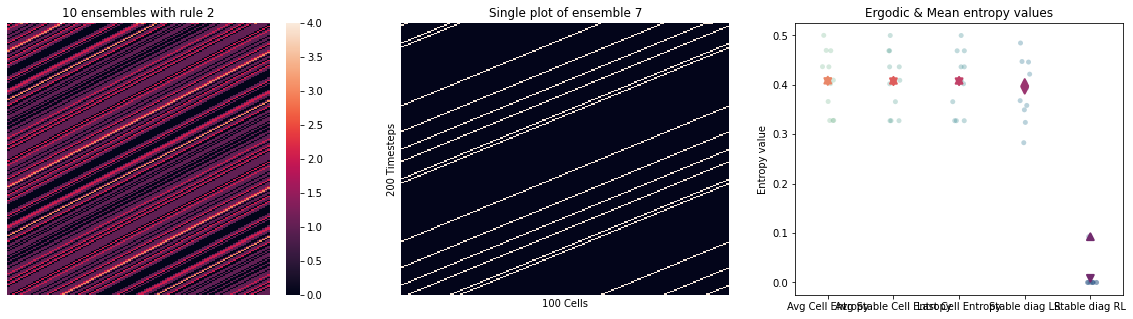

In [3]:
t = CA1DEnsemble(2, 100, 10, init='sparse', folder="../simulations/automata/results/")
t.run(200)
t.analyse()
t.plot()

https://plato.stanford.edu/entries/cellular-automata/supplement.html

### Candidate statistical rules
30, 182, 181, 167, 165, 121, 105

### Candidate complex rules
201
133
199
195
183?

73
70

169

220,
5,
1,
12,
248,
234,

218
225

99 (pyramids)


### Candidate mechanistic
0,8,253, 251,168, (flats out)
236
127

### Not sure if mechanistic or complex
4, 196

7 (mostly mechanistic flip flop, with some stripes)

### Perplexing as diagnoal
2
3
10
247

### Interesting
252, 254, 250, (has peaks at the beginning - so is complex initially, then becomes mechanistic)



In [5]:
lots = []
for r in range(0,255):
    y = CA1DEnsemble(r, 100, 10, init='sparse', folder="../simulations/automata/results/")
    y.load()
    y.analyse()
    y.save()
    print("completed", r)
    lots.append(y)

completed 0
completed 1
completed 2
completed 3
completed 4
completed 5
completed 6
completed 7
completed 8
completed 9
completed 10
completed 11
completed 12
completed 13
completed 14
completed 15
completed 16
completed 17
completed 18
completed 19
completed 20
completed 21
completed 22
completed 23
completed 24
completed 25
completed 26
completed 27
completed 28
completed 29
completed 30
completed 31
completed 32
completed 33
completed 34
completed 35
completed 36
completed 37
completed 38
completed 39
completed 40
completed 41
completed 42
completed 43
completed 44
completed 45
completed 46
completed 47
completed 48
completed 49
completed 50
completed 51
completed 52
completed 53
completed 54
completed 55
completed 56
completed 57
completed 58
completed 59
completed 60
completed 61
completed 62
completed 63
completed 64
completed 65
completed 66
completed 67
completed 68
completed 69
completed 70
completed 71
completed 72
completed 73
completed 74
completed 75
completed 76
completed

In [ ]:
for l in lots:
    l.plot()

/Users/timjdavey/Projects/complexity/complexity/notebooks/../simulations/automata/models.py:288: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


In [ ]:
RULE = 30
CELLS = 200
TIMESTEPS = 10000
REFRESH = [('random', 20), ('sparse', 20), ('simple',1), ('half', 1)]

experiments = []
for spread, count in REFRESH:
    x = CA1DEnsemble(RULE,CELLS,count=count,init=spread,folder="../simulations/automata/results/")
    #x.run(TIMESTEPS, True)
    x.load()
    #x.analyse()
    #x.save()
    experiments.append(x)
    print("completed", spread)